
# Fun with Julia

### Christina Lee

### Category: General

I wrote this piece as part of a presentation I gave to the robotics team at Benson High School in Portland, OR.  My thanks to my mentor John Delacy for working with me in high school and fostering my love of science and astronomy, and for inviting me to help work with the next generation of scientists and engineers.  I loved getting to see their robots and hear about the competitions.  

# Intro to Jupyter Notebooks

Currently, we are using a Jupyter notebook.  This format can support either Julia, Python, or R.  The setup is quite similar to that present in the propriety software Mathematica.  

We have two types of cells:
* Markdown cells
* Code Cells

### Markdown Cells

This is a <b>Markdown Cell</b>.  Here we write text or add pictures to describe what we are doing.  In raw format, everything is easily readable, but the computer can also render it to look even nicer with headings, lists,<b>bold</b>,<i>italic</i>, tables, links, and other formatting.  

I can even write equations.
\begin{equation}
x_0 = \frac{-b \pm \sqrt{b^2 - 4 a c}}{2a}
\end{equation}
Equations use LaTeX syntax.  LaTeX is a document preparation language used by those in STEM.  It's how we make all those awesome looking papers.  It also automatically handles our citations for us :)  Check out [Overleaf](https://www.overleaf.com/) to create documents online.  

I can also write code inline `x+=1` or in block style

    
    for ii in 1:n
        x+=1
    end

### Coding Cells

You can evaluate coding cells by pushing <b>Shift-Enter</b>.

Next to Coding Cells, `In[ ]` specifies the code the executable code, and `Out[]` specifies the output of the given cell.  The number indicates the order in which the chunk got evaluated.  

<b>Important</b>: Global variables get edited each time you evaluate a new cell.  So the order of evaluation matters.


### Julia's Packages

Julia uses external packages, much like Python, to supplement its core functionality.  <b>Plots.jl</b> is a uniform protocol for calling multiple different plotting packages.  [Julia](http://pkg.julialang.org/) maintains a complete list of supported external packages.  While many are quite specialized or out of date, some are incredibly useful, like different plotting tools, curve fitting, integrators, differential equations, accelerators, working with different file types, and more.  


In [1]:
# adding the packages
using Plots
gr()

Plots.GRBackend()

# Projectile Motion

![Spaceship](../images/Projectile/spaceship.svg)

\begin{equation}
\text{distance}= \text{rate}\times\text{time}\;\;\;\; \implies \;\;\;\;\;
x(t) = v_x t
\end{equation}
BUT
\begin{equation}
y(t) = v_y (t) t \;\;\;\;\;\text{?}
\end{equation}
NO! How do we solve this? 

First let's write down the infinitesimal, exact version of the equations.
\begin{equation}
\frac{d x}{dt} = v_x \;\;\; \frac{dy}{dt} = v_y
\end{equation}
\begin{equation}
\frac{d v_x}{dt} = 0 \;\;\;\; \frac{d v_y}{dt}= g
\end{equation}

To put this into an equation, we take the derivative and break it into a coarser-grained version
\begin{equation}
\frac{dx}{dt} \approx \frac{ \Delta x}{\Delta t}.
\end{equation}
Now because $\Delta x$ and $\Delta t$ have actual sizes instead of being infinitesimally small, the computer can deal with them.  

Now we take lots of baby steps of $\Delta t$ over our time interval to change the position with the changing velocity.
\begin{equation}
y(t_{n+1})= y(t_n)+ v_y(t_n) \Delta t
\end{equation}

We can also think of this as finding a small enough interval such that we can treat the $y$-velocity as if it's constant.


Bonus note:  Different types of algorithms, like symplectic, evaluate the velocity at different time points. 

### A cell of parameters we need to enter

We need to decide upon the parameters in the first cell. I've put in numbers that are reasonable and tested.

You can change the value of them and see what happens to the final answer.  Hopefully, nothing will break ;)

But breaking things is always fun too.

In [2]:
θ=π/4 #angle with respect to horizontal
v0=10 # initial velocity

x0=0; # initial position
y0=0;

t0=0 #initial time
tf=2 #final time
dt=1e-3 #time step size

0.001

### Preliminary calculation of relevant variables

Here again is more parameters, but we shouldn't change this cell.

Unless you want to go to the moon or Mars...

In [3]:
g=9.8 #m/s^2

vx0=v0*cos(θ) # x component of velocity at initial time step
vy0=v0*sin(θ) # y component of velocity at initial time step

t=collect(t0:dt:tf) # creates an array that holds each time point
nt=length(t) #the number of time steps we will have

2001

### Initialization of Variables

As we march along for a bunch of time steps, we will be computing our position and velocity, but we will need some place to put those numbers.  It's more efficient and better practice to create a place to put those numbers beforehand.  So that's what we are doing here.

We are also setting the first value in the position/ velocity vectors to be their initial values.

In [4]:
#initializing empty vectors that will hold position and velocity at each time step
x=zeros(length(t))
y=zeros(length(t))
vx=zeros(length(t))
vy=zeros(length(t))

x[1]=x0
y[1]=y0
vx[1]=vx0
vy[1]=vy0

7.071067811865475

### Loop of Time Steps

Now we do our actual calculation.  We march along, taking tiny little baby steps, calculating our new positions and our new velocities and storing them in our vectors.

In [5]:
for ii in 2:nt
    x[ii]=x[ii-1]+vx[ii-1]*dt
    y[ii]=y[ii-1]+vy[ii-1]*dt
    
    vx[ii]=vx[ii-1]
    vy[ii]=vy[ii-1]-g*dt
end

## Plotting

We use [Plots.jl](http://docs.juliaplots.org/latest/) to display our results here.

<b>Tips from Experience</b>: Always include $x$ and $y$ labels, title, legends, and relevant units <b>on the graph</b>.  

The graph might seem obvious to you now, but the labeling might not seem obvious to you next week, next month, or next year.  And it probably won't seem obvious to someone else looking at your work.

So I'll be taking a few extra lines to make sure I include all that.

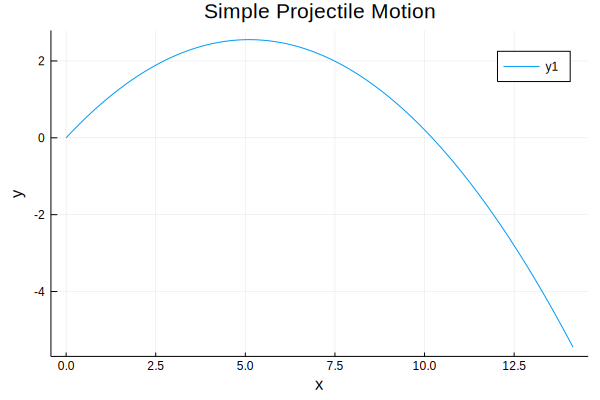

In [6]:
plot(x,y)
plot!(title="Simple Projectile Motion",xlabel="x",ylabel="y")

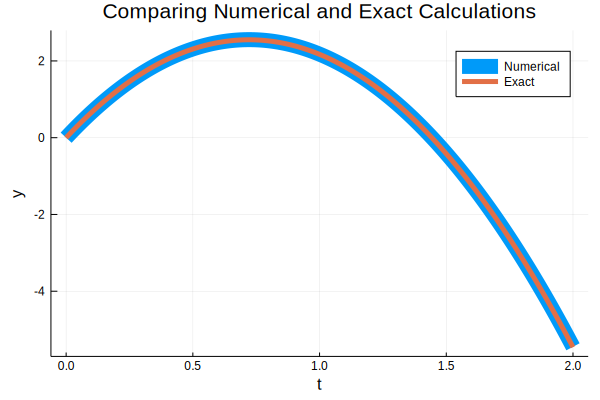

In [7]:
yexact=-g/2.0 .*t.^2.0 .+vy0.*t

plot(t,y
    ,linewidth=15,label="Numerical")
plot!(t,yexact
    ,linewidth=5,label="Exact")

plot!(xlabel="t",ylabel="y",
    title="Comparing Numerical and Exact Calculations")

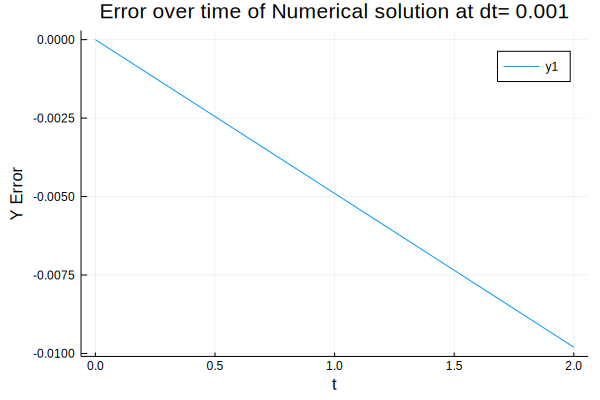

In [8]:
plot(t,yexact-y)

plot!(xlabel="t",ylabel="Y Error",
    title="Error over time of Numerical solution at dt= $dt")

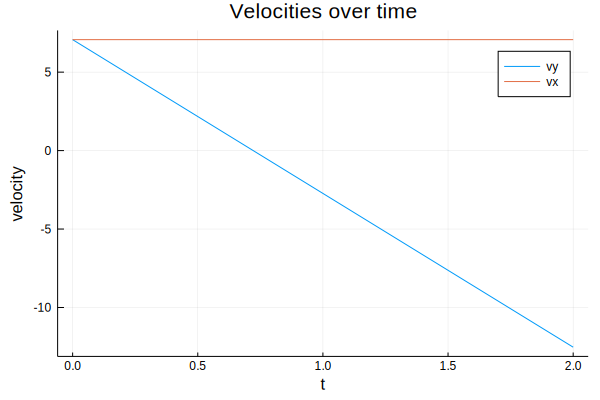

In [9]:
plot(t,vy,label="vy")
plot!(t,vx,label="vx")

plot!(xlabel="t",ylabel="velocity",
    title="Velocities over time")


## But what if there is a surface?

If we place a surface at $y=0$, or any other location, the ball won't just keep on falling forever.  We can choose two types of actions when it encounters the surface

* <b>Elastic Collision:</b> The ball bounces with the same amount of kinetic energy, just in the opposite direction
* <b>Inelastic Collision:</b> The ball loses a fraction of its energy in the collision.
    * At an extreme of this case, the ball loses all its energy.
    
We use an `if` statement to determine when it encounters the surface.  We'll just do an elastic collision, so we can just change $v_y$ and not have to worry about total energy, etc.

In [10]:
for ii in 2:nt
    x[ii]=x[ii-1]+vx[ii-1]*dt
    y[ii]=y[ii-1]+vy[ii-1]*dt
    
    if y[ii]<0
        println("Hit the surface at t: ",t[ii],"\t x: ",x[ii])
        vy[ii-1]=-vy[ii-1]
        y[ii]=y[ii-1]+vy[ii-1]*dt
    end
    
    vx[ii]=vx[ii-1]
    vy[ii]=vy[ii-1]-g*dt
end

Hit the surface at t: 1.445	 x: 10.217692988145673


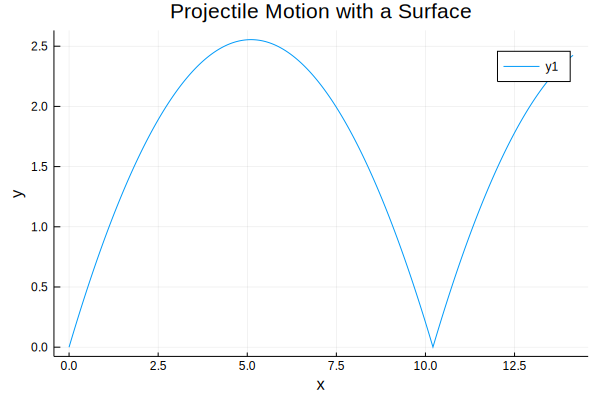

In [11]:
plot(x,y)

plot!(xlabel="x",ylabel="y",
    title="Projectile Motion with a Surface")

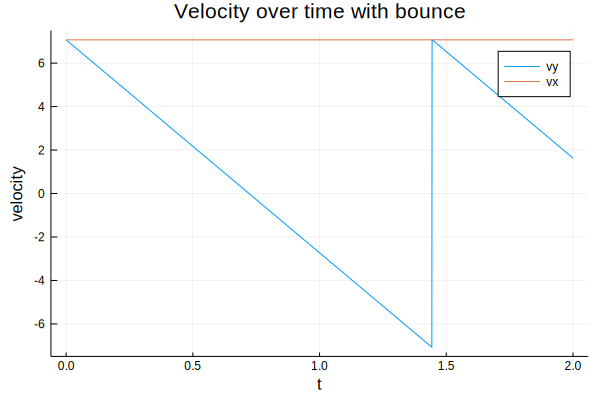

In [12]:
plot(t,vy,label="vy")
plot!(t,vx,label="vx")

plot!(xlabel="t",ylabel="velocity",
    title="Velocity over time with bounce")


## Why do we do analytics at all?

So we just found our intercepts and made a bunch of nice graphs without ever having to do any algebra.  Why do we force you to slog through it?

Because you need to know what to expect to determine when it's completely going wrong or when something might fail numerically.  

The parabola is pretty robust, but if you try other situations, like the Van der Pol problem or ones that display any instability, we would need to calibrate to the right step size.  More specialized algorithms, like the ones I talk about in my ODE post, also give more accuracy the same step size.

Let's do the same things but for a range of different time steps to show some of the limitations of numerical analysis.

In [13]:
# Let's choose our step sizes
dta=[.001,.01,.1,.2]

4-element Array{Float64,1}:
 0.001
 0.01 
 0.1  
 0.2  

In [14]:
# The length of each time series
# All arrays will be the same length, but some will be padded
na=floor.(Int,(tf-t0)./dta)

# The place holding arrays
ta=zeros(Float64,maximum(Int,na),length(dta))
xa=zeros(Float64,maximum(Int,na),length(dta))
ya=zeros(Float64,maximum(Int,na),length(dta))
vxa=zeros(Float64,maximum(Int,na),length(dta))
vya=zeros(Float64,maximum(Int,na),length(dta))

# Where we start
xa[1,:].=x0
ya[1,:].=y0
vxa[1,:].=vx0
vya[1,:].=vy0

# We perform one loop for each step size
for jj in 1:length(dta)
    
    # This is the step size for the loop
    dt=dta[jj]
    # We only use the first na[jj] of the arrays
    ta[1:na[jj],jj]=range(t0,stop=tf,length=na[jj])
    
    #The same loop we had before
    for ii in 2:na[jj]
        xa[ii,jj]=xa[ii-1,jj]+vxa[ii-1,jj]*dt
        ya[ii,jj]=ya[ii-1,jj]+vya[ii-1,jj]*dt

        if ya[ii,jj]<0
            vya[ii-1,jj]=-vya[ii-1,jj]
            ya[ii,jj]=ya[ii-1,jj]+vya[ii-1,jj]*dt
        end

        vxa[ii,jj]=vxa[ii-1,jj]
        vya[ii,jj]=vya[ii-1,jj]-g*dt
    end
    
end

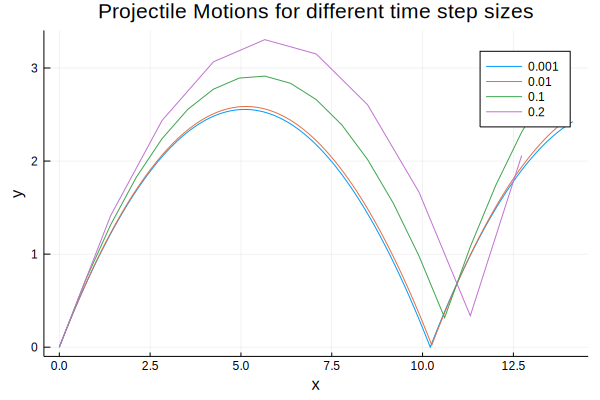

In [15]:
plot()
for ii in 1:length(dta)
    plot!(xa[1:na[ii],ii],ya[1:na[ii],ii],label=dta[ii])
end

plot!(xlabel="x",ylabel="y",
    title="Projectile Motions for different time step sizes")

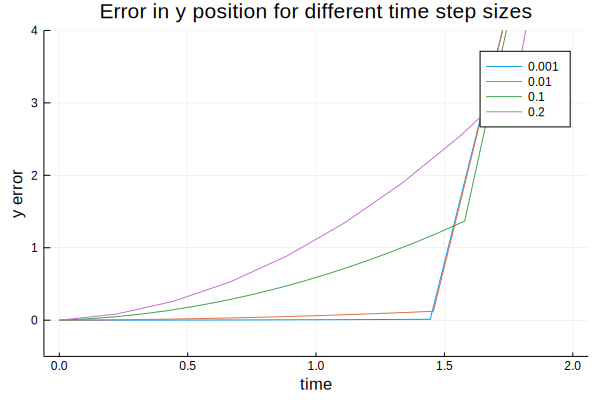

In [16]:
yexact=-g/2.0 .*ta.^2 .+vy0.*ta
yerr=ya-yexact

plot(ylims=(-.5,4))
for ii in 1:length(dta)
    plot!(ta[1:na[ii],ii],yerr[1:na[ii],ii],label=dta[ii])
end

plot!(xlabel="time",ylabel="y error",
    title="Error in y position for different time step sizes")

## What about Air Resistance?  

Real objects encounter air resistance proportional to velocity.  That effect can't be solved analytically, but our code can handle it easily.

We include air resistence by adding a force against the direction motion and proportional to the velocity squared in strength.  We then have to project it along the $x$ and $y$ directions.
\begin{equation}
\vec{F}=-\text{sign}(\vec{v}) \frac{1}{2}\rho C_d A v^2 = -\text{sign}( \vec{v}) R v^2,
\end{equation}
where $\rho$ is the density of the fluid, $C_d$ is the drag coefficient, $A$ is the cross section, and $R$ is the parameter I use here.

In [17]:
R=0.01
dt=1e-3

0.001

In [18]:
t=collect(t0:dt:tf) # creates an array that holds each time point
nt=length(t) #the number of time steps we will have

#initializing empty vectors that will hold position and velocity at each time step
x=zeros(length(t))
y=zeros(length(t))
vx=zeros(length(t))
vy=zeros(length(t))

x[1]=x0
y[1]=y0
vx[1]=vx0
vy[1]=vy0

E=zeros(length(t))
E[1]=g*y[1]+.5*(vx0^2+vy0^2)

50.0

In [19]:
for ii in 2:nt
    x[ii]=x[ii-1]+vx[ii-1]*dt
    y[ii]=y[ii-1]+vy[ii-1]*dt
    
     if y[ii]<0
        #println("Hit the surface at t: ",t[ii],"\t x: ",x[ii])
        vy[ii-1]=-vy[ii-1]
        y[ii]=y[ii-1]+vy[ii-1]*dt
    end
    
    sc=sqrt(vx[ii-1]^2+vy[ii-1]^2)
    vx[ii]=vx[ii-1]-R*vx[ii-1]*sc*dt
    vy[ii]=vy[ii-1]-g*dt-R*vy[ii-1]*sc*dt
    
    E[ii]=g*y[ii]+.5*(vx[ii]^2+vy[ii]^2)
end

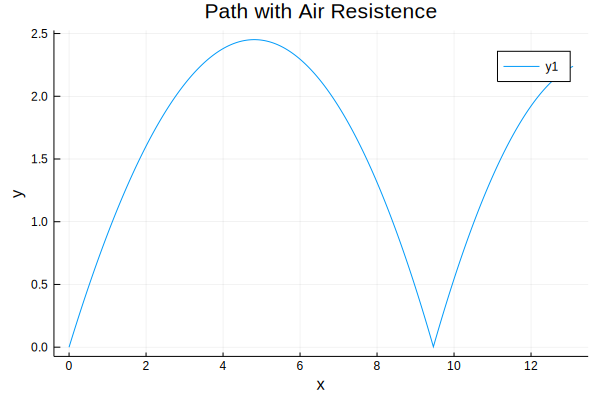

In [20]:
plot(x,y)
plot!(xlabel="x",ylabel="y",
    title="Path with Air Resistence")

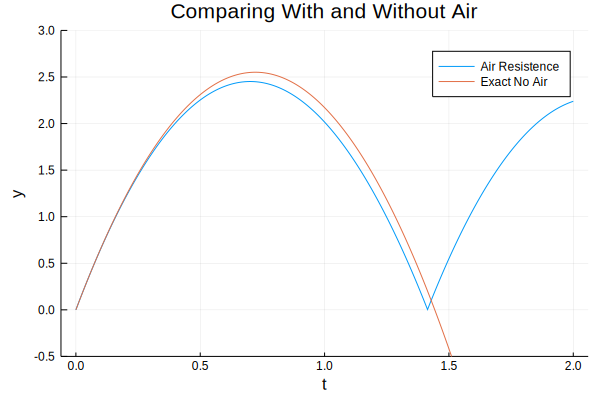

In [21]:
yexact=-g/2 .*t.^2 .+vy0.*t

plot(t,y,label="Air Resistence")
plot!(t,yexact,label="Exact No Air")

plot!(xlabel="t",ylabel="y",ylims=(-.5,3),
    title="Comparing With and Without Air")

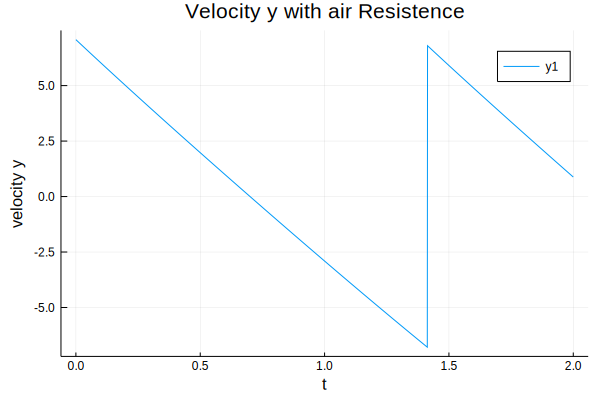

In [22]:
plot(t,vy)
plot!(xlabel="t",ylabel="velocity y",
    title="Velocity y with air Resistence")

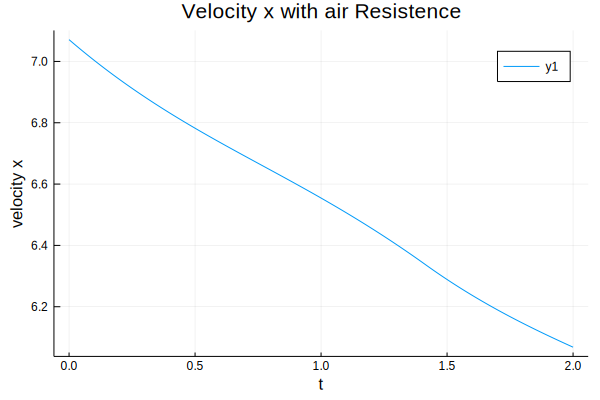

In [23]:
plot(t,vx)
plot!(xlabel="t",ylabel="velocity x",
    title="Velocity x with air Resistence")

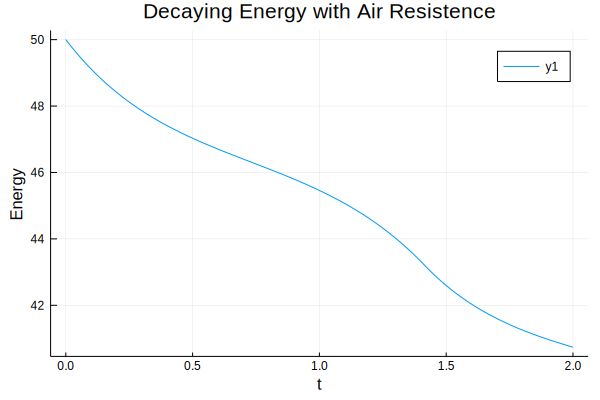

In [24]:
plot(t,E)

plot!(xlabel="t",ylabel="Energy",
    title="Decaying Energy with Air Resistence")

# Terminal Velocity

Since we already have the piece of code for air resistance written, let's just run it for a freely falling object to determine terminal velocity.

In [25]:
tf=10

10

In [26]:
t=collect(t0:dt:tf) # creates an array that holds each time point
nt=length(t) #the number of time steps we will have

#initializing empty vectors that will hold position and velocity at each time step
y=zeros(length(t))
vy=zeros(length(t))
E=zeros(length(t))

y[1]=0
vy[1]=0

E[1]=.5*vy0^2

24.999999999999996

In [27]:
for ii in 2:nt
    y[ii]=y[ii-1]+vy[ii-1]*dt
    
    vy[ii]=vy[ii-1]-g*dt-R*sign(vy[ii-1])*vy[ii-1]^2*dt
    
    E[ii]=g*y[ii]+.5*vy[ii]^2
end

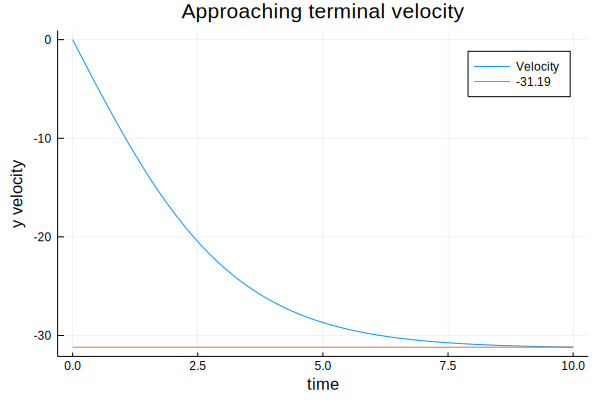

In [28]:
plot(t,vy,label="Velocity")
plot!(t,vy[end]*ones(length(t)),label=round(vy[end],digits=2))

plot!(xlabel="time",ylabel="y velocity",
    title="Approaching terminal velocity")

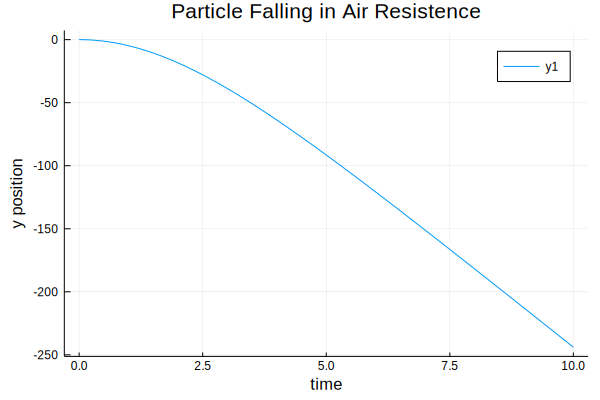

In [29]:
plot(t,y)
plot!(xlabel="time",ylabel="y position",
    title="Particle Falling in Air Resistence")

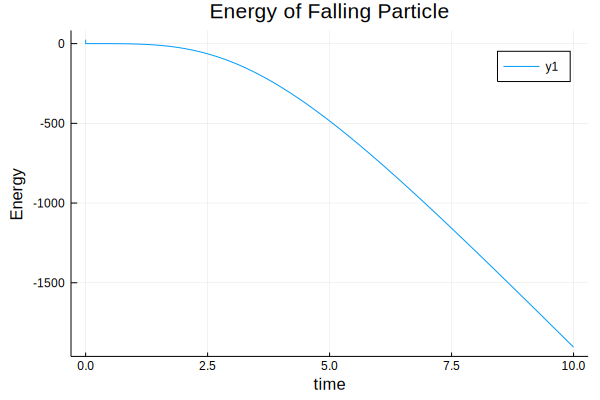

In [30]:
plot(t,E)
plot!(xlabel="time",ylabel="Energy",
    title="Energy of Falling Particle")

## The Termination

Now that we have seen terminal velocity, I will terminate this post.  See you next time :)  